WindowsPath('directional_coupler.gds')

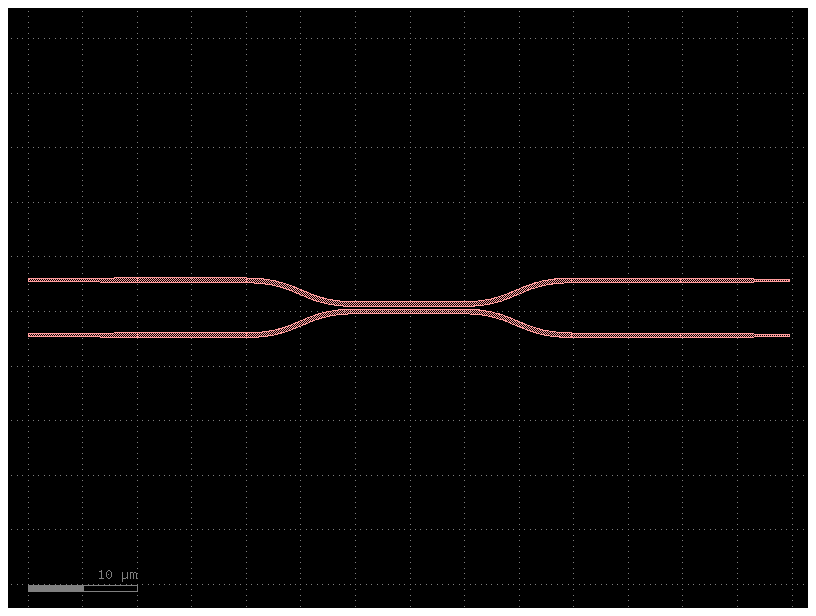

In [2]:
import gdsfactory as gf

@gf.cell
def beamsplitter_50_50(gap, interaction_length, dx, dy, wg_width, coupler_length, edge_width, length_straight, cross_section, layer):
    c = gf.Component()

    directional_coupler = gf.components.coupler(gap = gap, length = interaction_length, dy = dy, dx = dx, cross_section=cross_section)
    edge_coupler = gf.components.edge_coupler_silicon(length=coupler_length, width1=wg_width, width2=edge_width, with_two_ports=True, port_names=('o1', 'o2'), port_types=('optical', 'optical'), with_bbox=True)
    straight_wg = gf.components.straight(length = length_straight, cross_section=cross_section)

    directional_coupler_ref = c.add_ref(directional_coupler)
    edge_coupler1_ref = c.add_ref(edge_coupler)
    edge_coupler2_ref = c.add_ref(edge_coupler)
    edge_coupler3_ref = c.add_ref(edge_coupler)
    edge_coupler4_ref = c.add_ref(edge_coupler)

    straight_wg1_ref = c.add_ref(straight_wg)
    straight_wg2_ref = c.add_ref(straight_wg)
    straight_wg3_ref = c.add_ref(straight_wg)
    straight_wg4_ref = c.add_ref(straight_wg)

    straight_wg1_ref.connect('o1', other = directional_coupler_ref.ports['o1'])
    straight_wg2_ref.connect('o1', other = directional_coupler_ref.ports['o2'])
    straight_wg3_ref.connect('o1', other = directional_coupler_ref.ports['o3'])
    straight_wg4_ref.connect('o1', other = directional_coupler_ref.ports['o4'])

    edge_coupler1_ref.connect('o1', other = straight_wg1_ref.ports['o2'])
    edge_coupler2_ref.connect('o1', other = straight_wg2_ref.ports['o2'])
    edge_coupler3_ref.connect('o1', other = straight_wg3_ref.ports['o2'])
    edge_coupler4_ref.connect('o1', other = straight_wg4_ref.ports['o2'])

    return c

gap = 0.250
interaction_length = 9.8
dx = 10
dy = 5
wg_width = 0.430

coupler_length = 10
edge_width = 0.2
cross_section = gf.cross_section.cross_section(width=wg_width, offset=0, layer='WG', radius = 0)
length_straight = 10
layer = (1, 0)

beamsplitter = beamsplitter_50_50(gap = gap, interaction_length = interaction_length, dx = dx, dy = dy, wg_width=wg_width, coupler_length=coupler_length, edge_width=edge_width, length_straight = length_straight, cross_section=cross_section, layer=layer)
beamsplitter.plot()
beamsplitter.write_gds("directional_coupler.gds")